# Singular Value Decomposition

**Singular value decomposition (SVD)** is a matrix decomposition technique from linear algebra. A matrix $X$ is expressed as the product of two unitary matrices $U$ and $V$ (with unitary meaning that $U U^T = V^T V = I$) and a matrix $S$ whose entries are zero except for the diagonal entries, which could be positive numbers from largest (in the top left corner) to smallest (possibly 0), so $X = USV^T$. The diagonal entries of $S$ are the **singular values** of $X$.

The SVD contains all information about a matrix and encodes it in a simple manner. It is an important decomposition technique. PCA, for example, depends on the SVD of the data matrix.

$U$ and $V$ are **dense** (meaning that most if not all of their entries are not zero) while $S$ is sparse. We would need to store every column of $U$ and column of $V$ that corresponds to a non-zero singular value. But we can store less information by making some of the singular values of $S$ zero, and keeping only some of the columns of $U$ and $V$. After doing this we can use the information we kept to approximate the original matrix $X$ with arbitrary precision. (The more singular values kept, the better the approximation.)

If $X$ is an $m \times n$ matrix, then $U$ is $m \times m$, $V$ is $n \times n$, and $S$ is $m \times n$. If $X$ has $r$ non-zero singular values, the **compact SVD** finds $X = \tilde{U} \tilde{S} \tilde{V}^T$, where $\tilde{U}$ is a $m \times r$ matrix, $\tilde{S}$ is a $r \times r$ matrix, and $\tilde{V}$ is a $n \times r$ matrix. The compact SVD will perfectly reconstruct $X$ and by reducing the number of non-zero singular values (that is, reduce $r$), we reduce the amount of information we need to store.

In this notebook I demonstrate how SVD can be used for image compression. We will be compressing this image:

In [1]:
from PIL import Image
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
%matplotlib inline

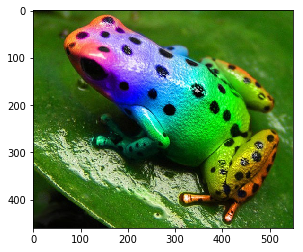

In [3]:
frog = np.array(Image.open("frog.png").convert("RGB")) / 255    # The last division to force numbers to be in [0,1]
plt.imshow(frog)

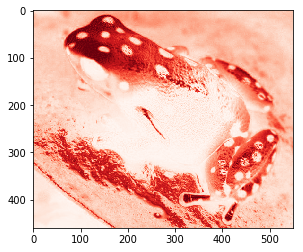

In [4]:
plt.imshow(frog[:, :, 0], cmap="Reds")

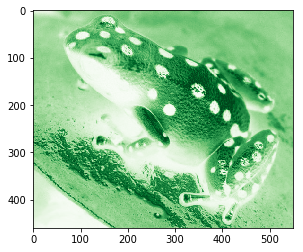

In [5]:
plt.imshow(frog[:, :, 1], cmap="Greens")

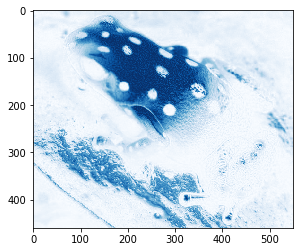

In [6]:
plt.imshow(frog[:, :, 2], cmap="Blues")

What if we wanted an SVD decomposition of the upper 5x7 corner of red values?

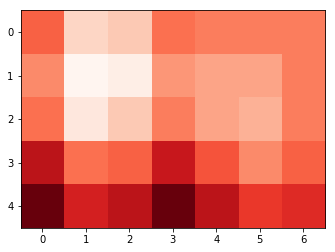

In [7]:
plt.imshow(frog[:5, :7, 0], cmap='Reds')

In [8]:
m, n = 5, 7
U, S, V = ln.svd(frog[:m, :n, 0])    # The full SVD
U

array([[-0.39788398, -0.36543522,  0.62422277, -0.13887922, -0.54699536],
       [-0.34678067, -0.6221523 , -0.04473671, -0.2066373 ,  0.66930511],
       [-0.37003258, -0.30173853, -0.58008747,  0.56828738, -0.33552605],
       [-0.48663527,  0.33444901, -0.4168619 , -0.66840546, -0.17547156],
       [-0.58965541,  0.52581492,  0.3131601 ,  0.41024039,  0.33084549]])

In [9]:
S    # The singular values

array([ 0.56718494,  0.04507853,  0.01186962,  0.00535811,  0.00239964])

In [10]:
V.T    # ln.svd returns the transpose of V as described above

array([[-0.44144148,  0.00805258, -0.34802796, -0.43122079, -0.6154589 ,
        -0.27495622,  0.20880411],
       [-0.31166565,  0.5449395 ,  0.23775207, -0.35146394,  0.48441701,
         0.01417878,  0.43702589],
       [-0.33600815,  0.50085745, -0.07655113,  0.75473694, -0.16608873,
        -0.18031113, -0.02558979],
       [-0.43036972,  0.0911213 , -0.21010348, -0.10506322,  0.01974858,
         0.74834709, -0.43690237],
       [-0.38033786, -0.11840556,  0.34471072, -0.15521284,  0.19526341,
        -0.50577589, -0.63597931],
       [-0.34801313, -0.3915078 ,  0.67341108,  0.18465919, -0.27207837,
         0.25389481,  0.3154961 ],
       [-0.37961076, -0.52584844, -0.44725717,  0.22730057,  0.49640768,
        -0.10672745,  0.26431653]])

All singular values are non-zero. We can form a compact SVD of this matrix to represent it in a smaller space, though. We may, for example, use only the first two singular values.

In [11]:
r = 2
nU, nS, nV = U[:m, :r], S[:r], V[:r, :n]
nU

array([[-0.39788398, -0.36543522],
       [-0.34678067, -0.6221523 ],
       [-0.37003258, -0.30173853],
       [-0.48663527,  0.33444901],
       [-0.58965541,  0.52581492]])

In [12]:
nS

array([ 0.56718494,  0.04507853])

In [13]:
nV.T

array([[-0.44144148,  0.00805258],
       [-0.31166565,  0.5449395 ],
       [-0.33600815,  0.50085745],
       [-0.43036972,  0.0911213 ],
       [-0.38033786, -0.11840556],
       [-0.34801313, -0.3915078 ],
       [-0.37961076, -0.52584844]])

In [14]:
nX = nU.dot(np.diag(nS)).dot(nV)
nX

array([[ 0.09948913,  0.06135783,  0.06757747,  0.0956221 ,  0.08778282,
         0.08498687,  0.09433066],
       [ 0.08660074,  0.04601792,  0.05204213,  0.08209333,  0.07812896,
         0.07943039,  0.08941297],
       [ 0.09253884,  0.05799919,  0.06370772,  0.08908524,  0.08143468,
         0.07836518,  0.08682409],
       [ 0.12196464,  0.09423929,  0.10029351,  0.12016108,  0.10319275,
         0.09015331,  0.09684926],
       [ 0.14782818,  0.11715129,  0.12424761,  0.14609427,  0.12439503,
         0.1071109 ,  0.11449425]])

In [15]:
nX.shape

(5, 7)

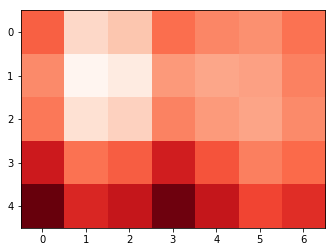

In [16]:
plt.imshow(nX, cmap="Reds")

The following function finds the matrices of the compact SVD of a matrix for approximation.

In [17]:
def approx_compact_svd(a, r):
    """Finds U S V for an approximation of matrix a with rank r"""
    m, n = a.shape
    U, S, V = ln.svd(a)
    return (U[:m, :r], S[:r], V.T[:n, :r])